# FOUR PARAMETERS LOGISTIC REGRESSION

In [1]:
# Four parameter logistic (4PL) curve is a regression model often used to analyze bioassays such as ELISA. 
# They follow a sigmoidal, or "s", shaped curve. 
# This type of curve is particularly useful for characterizing bioassays because bioassays are often only linear across a 
# specific range of concentration magnitudes

In [2]:
## DEPENDENCIES
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Data Loading

In [3]:
df = pd.read_csv('result/only9.5_to10.5.csv')
x_data = df['uM']
y_data = df['Fit']


# df = pd.read_csv('data_for_test/lepidium_metaremoved.csv')
# x_data = df['conc']
# y_data = df['weight']


# df = pd.read_csv('data_for_test/ryegrass_metaremoved.csv')
# x_data = df['conc']
# y_data = df['rootl']

# 2. Model Assumptions

## 2.1. Sigmoidal relationship

In [4]:
# The 4PL model assumes that the relationship between the predictor variable (e.g., dose or item difficulty) and the 
# response variable (e.g., probability of a correct answer or a response) follows a sigmoidal (S-shaped) curve. 
# This is often used to model the probability of a binary outcome.

## 2.2. Monotonicity

In [5]:
# The curve described by the 4PL model is monotonically increasing. This means that as the predictor variable increases, 
# the response variable (probability) will either consistently increase or decrease, but not oscillate.

C:\Users\HamzaZubair\.conda\envs\geo\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


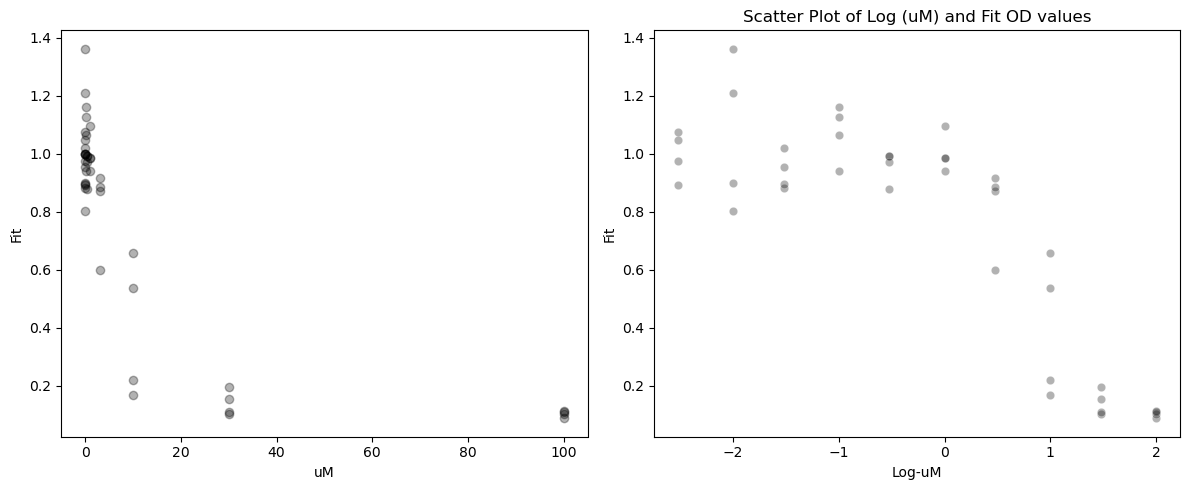

In [6]:
# Plotting
plt.figure(figsize=(12, 5))
# Linear scale plot
plt.subplot(1, 2, 1)
plt.scatter(x_data, y_data, color='black',alpha=0.3, label='Data')
plt.xlabel('uM')
plt.ylabel('Fit')

# Logarithmic scale plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=np.log10(x_data), y=y_data, color='black',alpha=0.3)
plt.xlabel('Log-uM')
plt.ylabel('Fit')
plt.title('Scatter Plot of Log (uM) and Fit OD values')


plt.tight_layout()
plt.show()

# 3. Model Construction

In [7]:
# Define the 4PL function
def four_pl(x, A, B, C, D):
    return A + (B - A) / (1 + (x / C) ** D)


A_guess = np.percentile(y_data, 5)  # More robust estimate for lower asymptote then using y_min, not prone to outlier/extreme values
B_guess = np.percentile(y_data, 95)  # More robust estimate for upper asymptote then using y_max, not prone to outlier/extreme values
C_guess = np.median(x_data)  # Still using the median
D_guess = 1  # Hill slope


initial_guess = [A_guess, B_guess, C_guess, D_guess]

# Define bounds for parameters
bounds = ([np.min(y_data) - 1, np.min(y_data), 0, 0], [np.max(y_data) + 1, np.max(y_data), np.max(x_data), 100])
#bounds = ([0, 0, 0, 0], [np.inf, np.inf, np.inf, 10])
# Fit the model to the data
try:
    popt, pcov = curve_fit(four_pl, x_data, y_data, p0=initial_guess, bounds=bounds, maxfev=2000)
    A_fit, B_fit, C_fit, D_fit = popt
    print(f'Fitted Parameters: A={A_fit}, B={B_fit}, C={C_fit}, D={D_fit}')
except Exception as e:
    print(f"An error occurred: {e}")

Fitted Parameters: A=0.09100687634632024, B=1.0100454133183805, C=6.618816246415256, D=1.7705486755903141


## 3.1. Visualisation

In [8]:
# np.linspace: Good for linear or uniformly distributed data.
# np.logspace: Better for data spanning multiple orders of magnitude or when fitting exponential curves.

### 3.1.1. Viz Test 1

In [9]:
# Function to test cofficient of variablility
def evaluate_data_variability(x_data):
    """
    Checks the Coefficient of Variation (CV) of predictor variable array and determines whether to use linspace or logspace fitting.
    """
    # Convert x_data to a NumPy array if it's not already
    x_data = np.asarray(x_data)
    
    # Calculate the Coefficient of Variation (CV)
    mean_x = np.mean(x_data)
    std_x = np.std(x_data)
    cv = std_x / mean_x
    
    # Determine which fitting method is more suitable
    if cv == 0:
        recommendation = "CV is zero. Data has no variability; either method can be used."
    elif cv < 0.1:
        recommendation = "Low CV. Data is relatively consistent; np.linspace is suitable."
    elif cv > 0.5:
        recommendation = "High CV. Data is highly variable; np.logspace may be more suitable."
    else:
        recommendation = "Moderate CV. Depending on the data range, either method could work; consider `np.logspace` for large ranges."
    
    print(f"Coefficient of Variation (CV): {cv:.4f}")
    print(f"Recommendation: {recommendation}")

evaluate_data_variability(x_data)

Coefficient of Variation (CV): 2.1920
Recommendation: High CV. Data is highly variable; np.logspace may be more suitable.


#### 3.1.2. Viz Test 2

In [10]:
# Function to test method of visualisation using data range

def choose_fitting_method(x_data):
    """
    Chooses between np.linspace and np.logspace for fitting based on the range of the predictor variable.
    """
    # Convert x_data to a NumPy array if it's not already
    x_data = np.asarray(x_data)
    
    # Calculate the range and maximum of x_data
    min_x = np.min(x_data)
    max_x = np.max(x_data)
    range_x = max_x - min_x
    
    # Calculate the range as a proportion of the maximum value
    range_ratio = range_x / max_x
    
    # Determine the appropriate fitting method
    if min_x <= 0:
        recommendation = "x_data contains zero or negative values; np.linspace should be used."
    elif range_ratio > 0.1:  # Threshold for range as proportion of maximum value
        recommendation = "Large range detected (greater than 10% of the maximum value); np.logspace may be more suitable."
    else:
        recommendation = "Moderate range detected (less than 10% of the maximum value); np.linspace is likely sufficient for fitting."
    
    # Print the results
    print(f"Range of x_data: {range_x:.2f}")
    print(f"Range as proportion of maximum value: {range_ratio:.2f}")
    print(f"Recommendation: {recommendation}")


choose_fitting_method(x_data)

Range of x_data: 100.00
Range as proportion of maximum value: 1.00
Recommendation: x_data contains zero or negative values; np.linspace should be used.


In [11]:
# since we can see that simple linspace wont be nice to display the values
# but our dataset has zero values also, so we will scale the x-axis using log (not the actual data)

### 3.1.3. Visualize using log and linspace

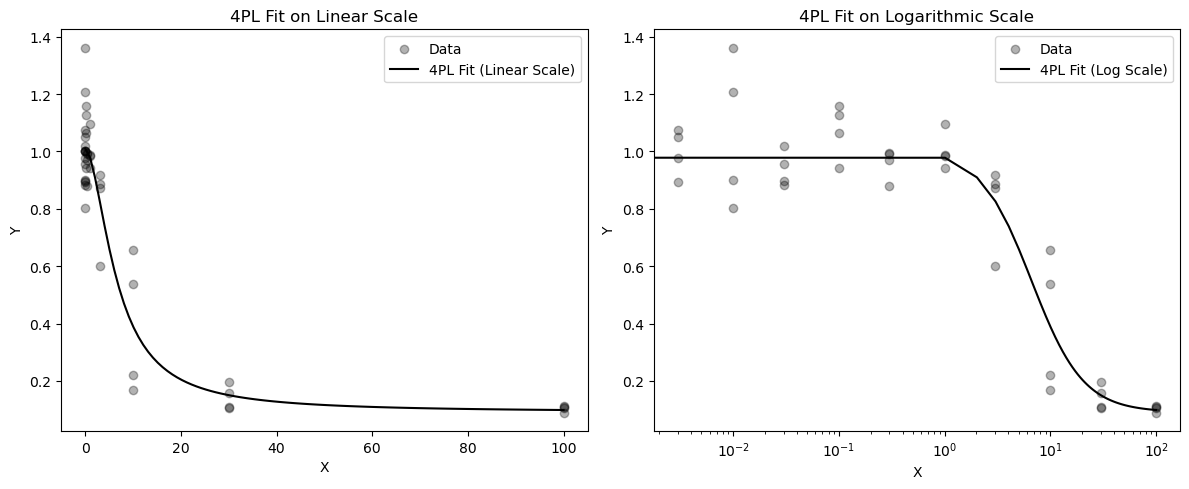

In [12]:
# Generate fitted values using linspace (linear scale)
x_fit_lin = np.linspace(np.min(x_data), np.max(x_data), 100)
y_fit_lin = four_pl(x_fit_lin, *popt)

# Plotting
plt.figure(figsize=(12, 5))

# Linear scale plot
plt.subplot(1, 2, 1)
plt.scatter(x_data, y_data, color='black', alpha=0.3, label='Data')
plt.plot(x_fit_lin, y_fit_lin, color='black', label='4PL Fit (Linear Scale)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('4PL Fit on Linear Scale')
plt.legend()

# Logarithmic scale plot (x-axis only)
plt.subplot(1, 2, 2)
plt.scatter(x_data, y_data, color='black', alpha=0.3, label='Data')
plt.plot(x_fit_lin, y_fit_lin, color='black', label='4PL Fit (Log Scale)')
plt.xscale('log')  # Apply logarithmic scale to the x-axis
plt.xlabel('X')
plt.ylabel('Y')
plt.title('4PL Fit on Logarithmic Scale')
plt.legend()

plt.tight_layout()
plt.show()

# 4. Model Validation

## 4.1. R-squared

In [13]:
# Compute the predicted values
y_pred = four_pl(x_data, *popt) #star unpacking

# Calculate residuals
residuals = y_data - y_pred

# Calculate R-squared
ss_total = np.sum((y_data - np.mean(y_data))**2)
ss_residual = np.sum(residuals**2)
r_squared = 1 - (ss_residual / ss_total)
print(f'R-squared: {round(r_squared,3)}')
# R-squared, or the coefficient of determination, ranges from 0 to 1. It quantifies the proportion of the variance in the dependent 
#variable 𝑌 that is explained by the independent variable(s) 𝑋
# A higher R-squared indicates that a larger proportion of the variability in the dependent variable is explained by the model, 
# suggesting a better fit. It reflects how well the independent variable(s) account for the variability in the dependent variable.
# A lower R-squared indicates that the model explains less of the variability, suggesting a poorer fit.
# For instance, an R-squared value of 0.902 means that 90.2% of the variability in the dependent variable can be explained by the 
# variability in the independent variable. This suggests a strong model fit. However, it is also important to consider other factors, 
# such as residual plots, statistical significance of the coefficients, and potential overfitting, as a high R-squared alone does 
# not guarantee a perfect model or account for all relevant predictors.

R-squared: 0.902


## 4.2. MSE

In [14]:
# Calculate fitted values
y_fit = four_pl(x_data, *popt)

# Calculate residuals
residuals = y_data - y_fit

# Calculate MSE
mse = np.mean(residuals**2)

# Calculate RMSE
rmse = np.sqrt(mse)
# Calculate percentage based relative MSE
relative_mse_percent = (mse / (np.max(y_data)**2)) * 100

# Calculate variance based relative MSE
variance_y = np.var(y_data)
relative_mse_variance = mse / variance_y


print(f'Mean Squared Error (MSE): {round(mse, 3)}')
# The Mean Squared Error (MSE) reflects the average squared difference between the actual values and the values predicted by the model.
# A smaller MSE indicates that the model's predictions are closer to the actual data points, suggesting a better fit of the model to 
# the data. A larger MSE indicates that the model's predictions deviate more from the actual values, suggesting a poorer fit.
# For instance, if your MSE is 0.014 and the maximum value of y is 1.36, this suggests that the model fits the data well, 
# as the MSE is relatively small compared to the range of the data.

print(f'Root Mean Squared Error (RMSE): {round(rmse, 3)}')
# Root Mean Squared Error (RMSE) is the square root of the Mean Squared Error (MSE) and provides a measure of the average magnitude 
# of the prediction errors in the same units as the response variable.
# A smaller RMSE indicates that the model's predictions are closer to the actual values, suggesting a better fit of the model to the 
# data. A larger RMSE suggests that the model’s predictions are farther from the actual values, indicating a poorer fit.
# For instance, if your RMSE is 0.116 it implies that, on average, the model's predictions of y variable (OD in this case) deviate 
# by 0.116 units from the actual measured values. This suggests that the model fits the data well, as the deviation is relatively small
# compared to the range of the observed values.

print(f'Relative MSE(Percentage based): {round(relative_mse_percent,3)}')
# Relative Mean Squared Error (Percentage Based) expresses the Mean Squared Error (MSE) as %age of the square of the max value of 𝑦.
# A lower Relative MSE (Percentage Based) indicates that the prediction errors are relatively small compared to the scale of the 
# response variable. A higher Relative MSE (Percentage Based) suggest that the prediction errors are larger relative to the max value
# For instance, a Relative MSE of 0.728% means that the MSE is approximately 0.728% of the square of the maximum value of 𝑦
# This suggests a good model fit, as the percentage is relatively small, indicating that the prediction errors are minimal in 
# relation to the scale of the data.

print(f'Relative MSE(Variance based): {round(relative_mse_variance,3)}')
# Relative Mean Squared Error (Variance Based) compares the Mean Squared Error (MSE) to the variability (variance) in the y variable
# A lower Relative MSE (Variance Based) indicates that the MSE is small relative to the data’s variance, suggesting that the model 
# explains a significant portion of the variability in the data. A higher Relative MSE (Variance Based) means that the MSE is 
# large relative to the data’s variance, indicating that the model captures less of the inherent variability in the data.
# For instance, a Relative MSE of 0.098 indicates that the MSE is approximately 9.78% of the variance in y. This implies that 
# the model accounts for a significant proportion of the variability in the data, suggesting a good fit.

Mean Squared Error (MSE): 0.014
Root Mean Squared Error (RMSE): 0.116
Relative MSE(Percentage based): 0.728
Relative MSE(Variance based): 0.098


## 4.3. Confidence intervals

In [15]:
# diagnol of parameter covariance matrix are the variance values for all the params
pcov

array([[ 3.33596053e-03, -1.44176048e-04, -3.84800760e-02,
         1.35407667e-02],
       [-1.44176048e-04,  5.94404909e-04, -6.11087176e-03,
        -3.23971680e-03],
       [-3.84800760e-02, -6.11087176e-03,  1.33725675e+00,
        -1.00780708e-01],
       [ 1.35407667e-02, -3.23971680e-03, -1.00780708e-01,
         1.87159732e-01]])

In [16]:
# Values found using the model
print(f'Fitted Parameters: A={A_fit}, B={B_fit}, C={C_fit}, D={D_fit}')

Fitted Parameters: A=0.09100687634632024, B=1.0100454133183805, C=6.618816246415256, D=1.7705486755903141


In [17]:
# Calculate standard error from the diagonal of the covariance matrix
perr = np.sqrt(np.diag(pcov))

# Define confidence level
confidence_level = 0.95

# Calculate z-score for 95% confidence interval
z_score = norm.ppf((1 + confidence_level) / 2)

# Calculate range within which you can be 95% confident the true parameter value lies
conf_intervals = z_score * perr

# List of fitted parameters
param_list = [A_fit, B_fit, C_fit, D_fit]
param_names = ['A', 'B', 'C', 'D']


print(f'{confidence_level*100} Confidence Interval:')
# Print the results
for name, fit, err in zip(param_names, param_list, conf_intervals):
    lower_bound = fit - err
    upper_bound = fit + err
    # Check if the fitted value lies within the confidence interval
    is_within = lower_bound <= fit <= upper_bound
    status = "within" if is_within else "outside"
    print(f'{name}: {lower_bound:.3f} to {upper_bound:.3f} (Fitted value: {fit:.3f} is {status} the confidence interval)')

95.0 Confidence Interval:
A: -0.022 to 0.204 (Fitted value: 0.091 is within the confidence interval)
B: 0.962 to 1.058 (Fitted value: 1.010 is within the confidence interval)
C: 4.352 to 8.885 (Fitted value: 6.619 is within the confidence interval)
D: 0.923 to 2.618 (Fitted value: 1.771 is within the confidence interval)


# 5. Model Predictions

In [18]:
# if we increase uM values what could be the output predicted growth

x_new = np.array([20, 30, 40, 50, 60, 70, 80, 90, 100])  

# Calculate the predicted y values
y_pred = four_pl(x_new, A_fit, B_fit, C_fit, D_fit)

print('Predicted y values:', y_pred)

# for uM 100 these are actual values
# 0.088495575
# 0.104529617
# 0.109929078
# 0.113138686

Predicted y values: [0.20468683 0.15020836 0.12751875 0.11592517 0.1091865  0.1049099
 0.10201763 0.09996526 0.09845308]


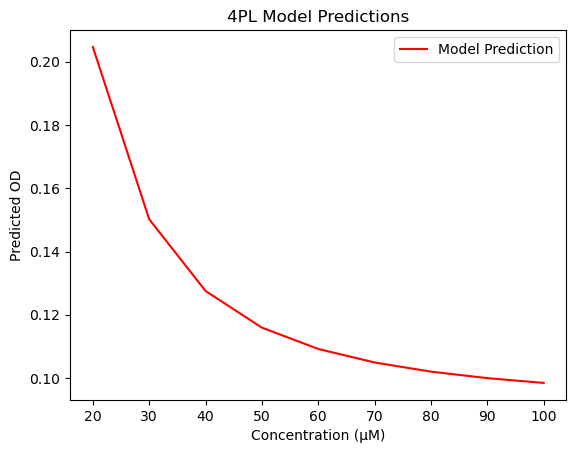

In [19]:
# Plot predicted values
plt.plot(x_new, y_pred, 'r-', label='Model Prediction')

# If you have actual data
# plt.scatter(x_actual, y_actual, color='blue', label='Actual Data')

plt.xlabel('Concentration (µM)')
plt.ylabel('Predicted OD')
plt.title('4PL Model Predictions')
plt.legend()
plt.show()